やりたいこと

・引ける牌の確率が変わったとき（手牌にある牌はその分引きづらくなるとか）のvalueを求める

・18種や27種（マンズだけでなく、ピンズやソーズも増やす）時のvalueを求める

面倒なので、まずは最大でも１色とする(n<=9)、手牌は14枚以下(m=3, 5, 8, 11, 14のみ)、同一牌は4枚(l = 4)でこれは固定。この条件でvalueを求める。



 **変数の意味**

- state : あがりに必要な枚数の手牌の状態

- hand : stateから一枚切った状態

In [3]:
from collections import defaultdict
def is_valid(seq, l=4): # 生成された組み合わせが手牌として妥当かどうかを判断する関数　list(seq)の一つ一つが一つの状態(手牌)に対応している
    counts = defaultdict(lambda: 0)
    for i in range(0, len(seq)):
        if i + 1 < len(seq) and seq[i] > seq[i + 1]: # 前半の条件はiが一番最後以外は常に成立、後半の条件は昇順に整列するための条件
            return False
        counts[seq[i]] += 1
        if (counts[seq[i]] > l): return False # 牌の上限枚数を超えたらFalse
    return True

import itertools
def number_state_slow(n,m,l): # 全ての手牌の組み合わせの数を出力する関数
    count = 0
    for seq in itertools.product(range(n), repeat = m): # 直積を作る関数, n=9 m=5 なら 9 ** 5 回繰り返す　
        if is_valid(seq,l):
            count += 1
            #print(list(seq))
    return count
    
def generate_all_l(n, m, l=4): # 全ての手牌の組み合わせを出力する関数
    gen_list = []
    for seq in itertools.product(range(n), repeat = m):
        if is_valid(seq, l):
            gen_list.append(seq)
    return gen_list

#state_434 = generate_all_l(4, 3, 4)
#state_954 = generate_all_l(9, 5, 4)
#hand_434 = generate_all_l(4, 2, 4)
#hand_954 = generate_all_l(9, 4, 4)
#print(len(hand_954))
#print(len(state_954))
#print(len(hand_434))
#print(len(state_434))
#print(hand_434)
#print(state_434)

def states_to_hist(state_list, n): # 手牌(state)を、牌種ごとの枚数のリスト(長さn)に変換する関数
    hist_list = []
    for state in state_list:
        ret = [0] * n # ret = [0,0,...,0]
        for c in state:
            ret[c] += 1
        hist_list.append(ret)
    return hist_list

In [4]:
# このあがり関数は使わない

# 手牌をhistで与えたときのあがり判定(n:牌の種類数, m:手牌の枚数)
# ただし、面子がぴったりN個あるときだけ(雀頭なしの手牌)でもTrueを返してしまう
def is_win(hist, n, m, l=4):
    if len(hist) != n or sum(hist) != m:
        print('n or m error')
        raise Exception
    if m == 0:
        return True
    elif m == 2: # 雀頭判定
        if hist.count(2) == 1:
            return True
        else:
            return False
    elif m == 3: # 面子判定
        if hist.count(3) == 1:
            return True
        j = hist.index(1)
        return (j + 1 < n and hist[j + 1] == 1 and j + 2 < n and hist[j + 2] == 1) # 順子判定
    elif m % 3 == 0: # 雀頭が残っていない
        for i in range(n):
            if hist[i] == 0:
                continue
            elif hist[i] == 1:
                if i + 1 >= n or hist[i + 1] == 0 or i + 2 >= n or hist[i + 2] == 0:
                    return False
                hist[i] -= 1
                hist[i + 1] -= 1
                hist[i + 2] -= 1
                return is_win(hist, n, m - 3, l) # 順子を抜く
            elif hist[i] == 2:
                if i + 1 >= n or hist[i + 1] <= 1 or i + 2 >= n or hist[i + 2] <= 1:
                    return False
                else:
                    hist[i] -= 2
                    hist[i + 1] -= 2
                    hist[i + 2] -= 2
                    return is_win(hist, n, m - 6, l) # 順子を二つ抜く
            elif hist[i] == 3:
                if i + 1 < n and hist[i + 1] >= 3 and i + 2 < n and hist[i + 2] >= 3:
                    hist_copy1 = hist[:]
                    hist[i] -= 3
                    hist[i + 1] -= 3
                    hist[i + 2] -= 3
                    hist_copy1[i] -= 3
                    return is_win(hist, n, m - 9, l) or is_win(hist_copy1, n, m - 3, l) #  三順子(面子)を抜く or 刻子を抜く
                else:
                    hist[i] -= 3
                    return is_win(hist, n, m - 3, l) # 刻子を抜く
            else: # hist[i] == 4
                if i + 1 >= n or hist[i + 1] <= 0 or i + 2 >= n or hist[i + 2] <= 0:
                    return False
                else:
                    hist[i] -= 1
                    hist[i + 1] -= 1
                    hist[i + 2] -= 1
                    return is_win(hist, n, m - 3, l)
    elif m % 3 == 2: # 雀頭が残っている
        for i in range(n):
            if hist[i] == 0:
                continue
            elif hist[i] == 1:
                if i + 1 >= n or hist[i + 1] == 0 or i + 2 >= n or hist[i + 2] == 0:
                    return False
                hist[i] -= 1
                hist[i + 1] -= 1
                hist[i + 2] -= 1
                return is_win(hist, n, m - 3, l) # 順子を抜く
            elif hist[i] == 2:
                if i + 1 >= n or hist[i + 1] <= 1 or i + 2 >= n or hist[i + 2] <= 1:
                    hist[i] -= 2
                    return is_win(hist, n, m - 2, l) # 雀頭を抜く
                else:
                    hist[i] -= 2
                    hist_copy = hist[:]
                    hist[i + 1] -= 2
                    hist[i + 2] -= 2
                    return is_win(hist, n, m - 6, l) or is_win(hist_copy, n, m - 2, l) # 順子を二つ抜く or  雀頭を抜く
            elif hist[i] == 3:
                if i + 1 < n and hist[i + 1] >= 3 and i + 2 < n and hist[i + 2] >= 3:
                    hist_copy1 = hist[:]
                    hist_copy2 = hist[:]
                    hist[i] -= 3
                    hist[i + 1] -= 3
                    hist[i + 2] -= 3
                    hist_copy1[i] -= 3
                    hist_copy2[i] -= 2
                    return is_win(hist, n, m - 9, l) or is_win(hist_copy1, n, m - 3, l) or is_win(hist_copy2, n, m - 2, l) #  三順子(面子)を抜く or 刻子を抜く or 雀頭を抜く
                else:
                    hist_copy = hist[:]
                    hist[i] -= 3
                    hist_copy[i] -= 2
                    return is_win(hist, n, m - 3, l) or is_win(hist_copy, n, m - 2, l) # 刻子を抜く or 雀頭を抜く
            else: # hist[i] == 4のとき、少なくとも一つは必ず順子を含む
                if i + 1 >= n or hist[i + 1] == 0 or i + 2 >= n or hist[i + 2] == 0:
                    return False
                else:
                    hist[i] -= 1
                    hist[i + 1] -= 1
                    hist[i + 2] -= 1
                    return is_win(hist, n, m - 3, l) # 順子を抜く
    else:
        print('m error')
        raise Exception

In [0]:
print(1, is_win([0, 1, 1, 1], 4, 3, 4), True)
print(2, is_win([0, 2, 0], 3, 2, 4), True)
print(3, is_win([0, 1, 2, 2], 4, 5, 4), False)
print(4, is_win([0, 2, 3], 3, 5, 4), True)
print(5, is_win([0, 1, 0, 2, 2], 5, 5, 4), False)
print(6, is_win([0, 1, 1, 1, 2], 5, 5, 4), True)
print(7, is_win([0, 4, 0, 0, 1], 5, 5, 4), False)
print(8, is_win([0, 3, 1, 1, 0], 5, 5, 4), True)
print(9, is_win([2, 0, 2, 2, 2], 5, 8, 4), True)
print(10, is_win([0, 2, 2, 2, 2], 5, 8, 4), True)
print(11, is_win([0, 3, 1, 1, 3], 5, 8, 4), True)
print(12, is_win([1, 2, 3, 2, 0], 5, 8, 4), False)
print(13, is_win([2, 4, 1, 1, 0], 5, 8, 4), True)
print(14, is_win([2, 3, 3, 0, 3], 5, 11, 4), True)
print(15, is_win([1, 1, 4, 1, 4], 5, 11, 4), True)
print(16, is_win([3, 3, 2, 3, 3], 5, 14, 4), True)
print(17, is_win([3, 2, 2, 1, 3, 3], 6, 14, 4), True)
print(18, is_win([3, 3, 2, 0, 2, 3, 2, 2], 8, 17, 4), False)
print(19, is_win([3, 2, 0, 4, 1, 1, 0, 3, 3], 9, 17, 4), True)
print(20, is_win([3, 3, 3, 1, 2, 2, 2, 1, 0], 9, 17, 4), True)
print(21, is_win([4, 4, 4, 4, 4, 4, 4, 4, 4, 2], 10, 38, 4), True)
print(22, is_win([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2], 13, 50, 4), True)

# unittestでかく  test caseを自動生成しても良い

1 True True
2 True True
3 False False
4 True True
5 False False
6 True True
7 False False
8 True True
9 True True
10 True True
11 True True
12 False False
13 True True
14 True True
15 True True
16 True True
17 True True
18 False False
19 True True
20 True True
21 True True
22 True True


## シンプルなis_winを書く
引数を変更する．
- hist : 牌のヒストグラム
- two : あといくつの対子を作らないといけないか?
- three : あといくつの順子あるいは刻子を作らないといけないか?


In [5]:
def is_win_sub(hist, two, three):
    if any(x < 0 for x in hist): return False # この行を消したかったら、順子判定のところで手牌の枚数が負になるものを弾いておく
    if two == 0 and three == 0: return True
    i = next(i for i, x in enumerate(hist) if x > 0) # histの中でx>０を満たす最小のindexを持ってくる
    if two > 0 and hist[i] >= 2 and is_win_sub([x - 2 if i == j else x for j, x in enumerate(hist)], two - 1, three): return True # 雀頭
    if three > 0 and hist[i] >= 3 and is_win_sub([x - 3 if i == j else x for j, x in enumerate(hist)], two, three - 1): return True # 刻子
    if three > 0 and i + 2 < len(hist) and is_win_sub([x -1 if i <= j <= i + 2 else x for j, x in enumerate(hist)], two, three - 1): return True # 順子
    return False
def is_win_main(hist):
    return is_win_sub(hist, 1 if sum(hist) % 3 == 2 else 0, sum(hist) // 3)

In [6]:
import unittest
class TestIsWin(unittest.TestCase):
    def test_win_case(self):
        self.assertTrue(is_win_main([0, 1, 1, 1]))
        self.assertTrue(is_win_main([0, 2, 0]))
        self.assertFalse(is_win_main([0, 1, 2, 2]))
        self.assertTrue(is_win_main([0, 2, 3]))
        self.assertFalse(is_win_main([0, 1, 0, 2, 2]))
        self.assertTrue(is_win_main([0, 1, 1, 1, 2]))
        self.assertFalse(is_win_main([0, 4, 0, 0, 1]))
        self.assertTrue(is_win_main([0, 3, 1, 1, 0]))
        self.assertTrue(is_win_main([2, 0, 2, 2, 2]))
        self.assertTrue(is_win_main([0, 2, 2, 2, 2]))
        self.assertTrue(is_win_main([0, 3, 1, 1, 3]))
        self.assertFalse(is_win_main([1, 2, 3, 2, 0]))
        self.assertTrue(is_win_main([2, 4, 1, 1, 0]))
        self.assertTrue(is_win_main([2, 3, 3, 0, 3]))
        self.assertTrue(is_win_main([1, 1, 4, 1, 4]))
        self.assertTrue(is_win_main([3, 3, 2, 3, 3]))
        self.assertTrue(is_win_main([3, 2, 2, 1, 3, 3]))
        self.assertFalse(is_win_main([3, 3, 2, 0, 2, 3, 2, 2]))
        self.assertTrue(is_win_main([3, 2, 0, 4, 1, 1, 0, 3, 3]))
        self.assertTrue(is_win_main([3, 3, 3, 1, 2, 2, 2, 1, 0]))
        self.assertTrue(is_win_main([4, 4, 4, 4, 4, 4, 4, 4, 4, 2]))
        self.assertTrue(is_win_main([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2]))
suite = unittest.TestSuite()
suite.addTest(TestIsWin('test_win_case'))
runner = unittest.TextTestRunner()
runner.run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [21]:
def hand_to_prob_and_state(hand, n, m, l=4): # ある手牌(hand)における、1枚ツモる時の遷移確率(prob)と手牌(state)のindexのタプルを出す関数
    state_nml = generate_all_l(n, m, l) # 各handのたびにこれをやるのは無駄な気がする
    #print(state_nml)
    ret = [l] * n  #  残り枚数を表すリスト
    for h in hand:
        ret[h] -= 1
    yama_sum = n * l - (m - 1)
    state_list = []
    for i in range(n):
        if ret[i] == 0: 
            continue
        prob = ret[i] / yama_sum # 遷移確率
        state = tuple(sorted(list(hand) + [i])) # 遷移後の手牌
        #print(state)
        state_index = state_nml.index(state) # 遷移後の手牌のindex
        #print(state_index)
        state_list.append((prob, state_index))
    return state_list

#h2ps_434 = [hand_to_prob_and_state(hand, 4, 3, 4) for hand in hand_434]
#print(len(h2ps_434))
#print(h2s_434)
#h2ps_954 = [hand_to_prob_and_state(hand, 9, 5, 4) for hand in hand_954]
#print(len(h2ps_954))
#print(h2s_954[0],'\n')
#print(h2s_954[1],'\n')

def state_to_hand(state): # ある手牌stateに遷移できるhandを出力する関数
    return list(set(tuple(state[:i] + state[i+1:]) for i in range(len(state)))) # i番目の要素を取り除く

#s2h_954 = [[hand_954.index(hand) for hand in state_to_hand(state)] for state in state_954]
#print(s2h_954[0], s2h_954[342])

In [6]:
def value_iteration(n, m, l, gamma):
    state_nml = generate_all_l(n, m, l)
    hand_nml = generate_all_l(n, m-1, l)
    hist_nml = states_to_hist(state_nml, n)
    is_win_nml = [is_win(hist, n, m) for hist in hist_nml]
    h2ps_nml = [hand_to_prob_and_state(hand, n, m, l) for hand in hand_nml]
    s2h_nml = [[hand_nml.index(hand) for hand in state_to_hand(state)] for state in state_nml]
    value_hand = [0] * len(hand_nml)
    n_hand = len(hand_nml)
    value_state = [1 if is_win_nml[i] else 0 for i in range(len(state_nml))] # あがっていればvalueは1、いなければ0
    n_state = len(state_nml)
    theta = 1e-6
    while True:
        print('iteration')
        delta = 0
        for i in range(n_hand):
            old_v = value_hand[i]
            value_hand[i] = sum(p * value_state[n] for (p, n) in h2ps_nml[i])
            delta = max(delta, abs(old_v - value_hand[i]))
        if delta < theta: break
        for i in range(n_state):
            if is_win_nml[i]: continue
            value_state[i] = max(gamma * value_hand[n] for n in s2h_nml[i])
    return value_hand

#value_hand954 = value_iteration(9, 5, 4, 0.9)

In [0]:
state_954 = generate_all_l(9, 5, 4)
hand_954 = generate_all_l(9, 4, 4)
h2ps_954 = [hand_to_prob_and_state(hand, 9, 5, 4) for hand in hand_954]
s2h_954 = [[hand_954.index(hand) for hand in state_to_hand(state)] for state in state_954]
value_hand954 = value_iteration(9, 5, 4, 0.9)
hist_954 = states_to_hist(state_954, 9)
is_win_954 = [is_win(hist, 9, 5) for hist in hist_954]

iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


In [0]:
for i, h in enumerate(hand_954):
    #print(i, h)
    #print(h2s_954[i])
    print('%s -> %s' % (h, [state_954[s] for (p,s) in h2ps_954[i]]))

(0, 0, 0, 0) -> [(0, 0, 0, 0, 1), (0, 0, 0, 0, 2), (0, 0, 0, 0, 3), (0, 0, 0, 0, 4), (0, 0, 0, 0, 5), (0, 0, 0, 0, 6), (0, 0, 0, 0, 7), (0, 0, 0, 0, 8)]
(0, 0, 0, 1) -> [(0, 0, 0, 0, 1), (0, 0, 0, 1, 1), (0, 0, 0, 1, 2), (0, 0, 0, 1, 3), (0, 0, 0, 1, 4), (0, 0, 0, 1, 5), (0, 0, 0, 1, 6), (0, 0, 0, 1, 7), (0, 0, 0, 1, 8)]
(0, 0, 0, 2) -> [(0, 0, 0, 0, 2), (0, 0, 0, 1, 2), (0, 0, 0, 2, 2), (0, 0, 0, 2, 3), (0, 0, 0, 2, 4), (0, 0, 0, 2, 5), (0, 0, 0, 2, 6), (0, 0, 0, 2, 7), (0, 0, 0, 2, 8)]
(0, 0, 0, 3) -> [(0, 0, 0, 0, 3), (0, 0, 0, 1, 3), (0, 0, 0, 2, 3), (0, 0, 0, 3, 3), (0, 0, 0, 3, 4), (0, 0, 0, 3, 5), (0, 0, 0, 3, 6), (0, 0, 0, 3, 7), (0, 0, 0, 3, 8)]
(0, 0, 0, 4) -> [(0, 0, 0, 0, 4), (0, 0, 0, 1, 4), (0, 0, 0, 2, 4), (0, 0, 0, 3, 4), (0, 0, 0, 4, 4), (0, 0, 0, 4, 5), (0, 0, 0, 4, 6), (0, 0, 0, 4, 7), (0, 0, 0, 4, 8)]
(0, 0, 0, 5) -> [(0, 0, 0, 0, 5), (0, 0, 0, 1, 5), (0, 0, 0, 2, 5), (0, 0, 0, 3, 5), (0, 0, 0, 4, 5), (0, 0, 0, 5, 5), (0, 0, 0, 5, 6), (0, 0, 0, 5, 7), (0, 0, 0, 5, 8

In [0]:
for v in sorted((value_hand954[i], hand) for i, hand in enumerate(hand_954)): print (v)

(0.5401745575377077, (0, 1, 7, 8))
(0.541288114660665, (0, 1, 4, 8))
(0.541288114660665, (0, 4, 7, 8))
(0.5428875794985162, (0, 1, 5, 8))
(0.5428875794985163, (0, 3, 7, 8))
(0.5477820147191425, (0, 1, 4, 7))
(0.5477820147191425, (1, 4, 7, 8))
(0.5540794395388401, (0, 2, 7, 8))
(0.5540794395388402, (0, 1, 6, 8))
(0.5551164063260002, (0, 1, 3, 8))
(0.5551164063260002, (0, 5, 7, 8))
(0.5564102787281917, (0, 3, 5, 8))
(0.5565762597197544, (0, 1, 5, 7))
(0.5565762597197546, (1, 3, 7, 8))
(0.5571728500464871, (0, 2, 5, 8))
(0.5571728500464871, (0, 3, 6, 8))
(0.5595431646061694, (0, 1, 3, 7))
(0.5595431646061694, (1, 5, 7, 8))
(0.5600082187676017, (0, 4, 6, 8))
(0.5600082187676018, (0, 2, 4, 8))
(0.5641537331127121, (0, 2, 6, 8))
(0.5643936081511972, (0, 3, 5, 7))
(0.5643936081511973, (1, 3, 5, 8))
(0.565780298569044, (0, 2, 4, 7))
(0.565780298569044, (1, 4, 6, 8))
(0.566612820346691, (0, 1, 4, 6))
(0.566612820346691, (2, 4, 7, 8))
(0.5681786423423274, (0, 1, 3, 6))
(0.5681786423423274, (2, 5

In [0]:
is_ready954 = [any(is_win_954[s] for (p, s) in h2ps_954[i]) for i, hand in enumerate(hand_954)]
is_ready954
print(len(is_ready954))

495


In [0]:
for i, s in enumerate(state_954):
    if any(is_ready954[hand] for hand in s2h_954[i]) and not is_ready954[max((value_hand954[h], h) for h in s2h_954[i])[1]]:
        print(s)

(0, 0, 3, 7, 8)
(0, 1, 1, 2, 5)
(0, 1, 1, 2, 6)
(0, 1, 1, 2, 7)
(0, 1, 2, 2, 4)
(0, 1, 2, 2, 5)
(0, 1, 2, 2, 6)
(0, 1, 2, 2, 7)
(0, 1, 5, 8, 8)
(1, 1, 2, 2, 6)
(1, 2, 2, 3, 6)
(1, 6, 6, 7, 8)
(1, 6, 7, 7, 8)
(2, 5, 6, 6, 7)
(2, 6, 6, 7, 7)
(2, 6, 6, 7, 8)
(2, 6, 7, 7, 8)
(3, 6, 6, 7, 8)
(3, 6, 7, 7, 8)
(4, 6, 6, 7, 8)


In [0]:
#  このセルは使わないものをおいておく

def hist_to_state(hist):
    state = []
    for i, j in enumerate(hist):
        if j > 0:
            for k in range(j):
                state.append(i)
    return state
#st = hist_to_state([0,0,1,2,2,1,2])
#print(st)
          
def is_win(n, m, state): # 手牌(state)のあがり判定をする関数
    if m == 3:
        return is_win_3(n, state)
    elif m == 5:
        return is_win_5(n, state)
    elif m == 8:
        return is_win_8(n, state)
    elif m == 11:
        return is_win_11(n, state)
    elif m == 14:
        return is_win_14(n, state)
    else:
        raise Exception
        
def is_win_3(n, state):
    hist = states_to_hist(n, state)
    if hist.count(3) == 1:
        return True
    j = hist.index(1)
    return (j + 1 < n and hist[j + 1] == 1) and (j + 2 < n and hist[j + 2] == 1)
is_win_434 = [is_win(4,3,state) for state in state434]
#print(len(is_win_434))
#print(is_win_434)
        
def is_win_5(n, state):
    hist = states_to_hist(n, state)
    if hist.count(3) > 0:
        if hist.count(2) > 0: return True # 刻子と雀頭ができているパターン
        j = hist.index(3)
        if j + 1 < len(hist) and hist[j + 1] == 1:
            return (j + 2 < len(hist) and hist[j + 2] == 1) or (0 <= j - 1 and hist[j - 1] == 1) # 雀頭と順子のパターン
        return  (0 <= j - 1 and hist[j - 1] == 1) and  (0 <= j - 2 and hist[j - 2] == 1)
    elif hist.count(2) > 0:
        j = hist.index(1) # 最初に1が出てくるリストのindexを返す
        return   (j + 1 < len(hist) and hist[j + 1] == 1) and (j + 2 < len(hist) and hist[j + 2] == 1) # 順子判定
    else: return False
is_win_954 = [is_win(9, 5, state) for state in state954]
#print(len(is_win_954))
    
def is_win_8(n, state):
    hist = states_to_hist(n, state)
    for i in range(n):
        if hist[i] >= 2: # 雀頭候補
            hist_copy = hist[:]
            hist_copy[i] -= 2
            if hist_copy.count(3) > 0: # 刻子
                j1 = hist_copy.index(3)
                hist_copy[j1] -= 3
                if hist_copy.count(3) > 0: # 刻子
                    return True
                else:
                    j2 = hist_copy.index(1) # 順子判定
                    if (j2 + 1 < len(hist) and hist[j2 + 1] == 1) and (j2 + 2 < len(hist) and hist[j2 + 2] == 1):
                        return True
                hist_copy[j1] += 3
            for j3 in range(n): # 順子二つの判定
                if hist_copy[j3] >= 1:
                    if (j3 + 1 < len(hist) and hist[j3 + 1] == 1) and (j3 + 2 < len(hist) and hist[j3 + 2] == 1):
                        hist_copy[j3] -= 1
                        hist_copy[j3 + 1] -= 1
                        hist_copy[j3 + 2] -= 1
                        j4 = hist_copy.index(1)
                        if (j4 + 1 < len(hist) and hist[j4 + 1] == 1) and (j4 + 2 < len(hist) and hist[j4 + 2] == 1):
                            return True
                        hist_copy[j3] += 1
                        hist_copy[j3 + 1] += 1
                        hist_copy[j3 + 2] += 1
            hist_copy[i] += 2  
    return False
#print(is_win_8(9, [5,4,3,7,7,1,1,1]))

def is_win_11(n, state):
    return True

def is_win_14(n, state):
    return True

# ver.1
def is_win_sub(hist, two, three):
    if any(x < 0 for x in hist): return False
    if two == 0 and three == 0: return True
    for i, x in enumerate(hist):
        if x == 0: continue
        if two > 0 and hist[i] >= 2 and is_win_sub([x - 2 if i == j else x for j, x in enumerate(hist)], two - 1, three): return True
        if three > 0 and hist[i] >= 3 and is_win_sub([x - 3 if i == j else x for j, x in enumerate(hist)], two, three - 1): return True
        if three > 0 and i + 2 < len(hist) and is_win_sub([x -1 if i <= j <= i + 2 else x for j, x in enumerate(hist)], two, three - 1): return True
        return False
def is_win_main(hist):
    return is_win_sub(hist, 1 if sum(hist) % 3 == 2 else 0, sum(hist) // 3)


# 可読性をあげたもの（上と同じ）
def is_win_sub(hist, two, three):
    if any(x < 0 for x in hist): # anyを使ってhistのチェック
        return False
    if two == 0 and three == 0:
        return True
    for i, x in enumerate(hist):
        if x == 0:
            continue
        if two > 0 and x >= 2:
            hist_copy = [x - 2 if i == j else x for j, x in enumerate(hist)] # 雀頭を抜く
            if is_win_sub(hist_copy, two - 1, three):
                return True
        if three > 0 and x >= 3:
            hist_copy = [x - 3 if i == j else x for j, x in enumerate(hist)] # 刻子を抜く
            if is_win_sub(hist_copy, two, three - 1):
                return True
        if three > 0 and i + 2 < len(hist) and hist[i+1] > 0 and hist[i+2] > 0:
            hist_copy = [x - 1 if i <= j <= i + 2 else x for j, x in enumerate(hist)] # 順子を抜く(この時点では抜けるかどうかの判定は行わない)
            if is_win_sub(hist_copy, two, three - 1):
                return True
        return False # histの中でx>0の最小のiが求まればよい
def is_win_main(hist):
    n_two = 1 if sum(hist) % 3 == 2 else 0 # histにおける雀頭の数(1 or 0)
    n_three = sum(hist) // 3                         # histにおける面子の数
    return is_win_sub(hist, n_two, n_three)

### 必要な関数の再定義 (ここから実行すれば良い)

In [1]:
from collections import defaultdict
def is_valid(seq, l=4): # 生成された組み合わせが手牌として妥当かどうかを判断する関数　list(seq)の一つ一つが一つの状態(手牌)に対応している
    counts = defaultdict(lambda: 0)
    for i in range(0, len(seq)):
        if i + 1 < len(seq) and seq[i] > seq[i + 1]: # 前半の条件はiが一番最後以外は常に成立、後半の条件は昇順に整列するための条件
            return False
        counts[seq[i]] += 1
        if (counts[seq[i]] > l): return False # 牌の上限枚数を超えたらFalse
    return True

import itertools
def number_state_slow(n,m,l): # 全ての手牌の組み合わせの数を出力する関数
    count = 0
    for seq in itertools.product(range(n), repeat = m): # 直積を作る関数, n=9 m=5 なら 9 ** 5 回繰り返す　
        if is_valid(seq,l):
            count += 1
            #print(list(seq))
    return count
    
def generate_all_l(n, m, l=4): # 全ての手牌の組み合わせを出力する関数
    gen_list = []
    for seq in itertools.product(range(n), repeat = m):
        if is_valid(seq, l):
            gen_list.append(seq)
    return gen_list

def states_to_hist(state_list, n): # 手牌(state)を、牌種ごとの枚数のリスト(長さn)に変換する関数
    hist_list = []
    for state in state_list:
        ret = [0] * n # ret = [0,0,...,0]
        for c in state:
            ret[c] += 1
        hist_list.append(ret)
    return hist_list

def hand_to_prob_and_state(hand, state_nml, n, m, l=4): # ある手牌(hand)における、1枚ツモる時の遷移確率(prob)と手牌(state)のindexのタプルを出す関数
    #print(state_nml)
    ret = [l] * n  #  残り枚数を表すリスト
    for h in hand:
        ret[h] -= 1
    yama_sum = n * l - (m - 1)
    state_list = []
    for i in range(n):
        if ret[i] == 0: 
            continue
        prob = ret[i] / yama_sum # 遷移確率
        state = tuple(sorted(list(hand) + [i])) # 遷移後の手牌
        #print(state)
        state_index = state_nml.index(state) # 遷移後の手牌のindex
        #print(state_index)
        state_list.append((prob, state_index))
    return state_list

def state_to_hand(state): # ある手牌stateに遷移できるhandを出力する関数
    return list(set(tuple(state[:i] + state[i+1:]) for i in range(len(state)))) # i番目の要素を取り除く

def is_win_sub(hist, two, three):
    if any(x < 0 for x in hist):
        return False # この行を消したかったら、順子判定のところで手牌の枚数が負になるものを弾いておく
    if two == 0 and three == 0:
        return True
    i = next(i for i, x in enumerate(hist) if x > 0) # histの中でx>０を満たす最小のindexを持ってくる
    if two > 0 and hist[i] >= 2 and is_win_sub([x - 2 if i == j else x for j, x in enumerate(hist)], two - 1, three): # 雀頭
        return True
    if three > 0 and hist[i] >= 3 and is_win_sub([x - 3 if i == j else x for j, x in enumerate(hist)], two, three - 1): # 刻子
        return True
    if three > 0 and i + 2 < len(hist) and is_win_sub([x -1 if i <= j <= i + 2 else x for j, x in enumerate(hist)], two, three - 1): # 順子
        return True
    return False

def is_win_main(hist):
    n_two = 1 if sum(hist) % 3 == 2 else 0
    n_three = sum(hist) // 3
    return is_win_sub(hist, n_two, n_three)

def value_iteration1(n, m, l, gamma):
    state_nml = generate_all_l(n, m, l)
    hand_nml = generate_all_l(n, m-1, l)
    hist_nml = states_to_hist(state_nml, n)
    is_win_nml = [is_win_main(hist) for hist in hist_nml]
    h2ps_nml = [hand_to_prob_and_state(hand, state_nml, n, m, l) for hand in hand_nml]
    s2h_nml = [[hand_nml.index(hand) for hand in state_to_hand(state)] for state in state_nml]
    value_hand = [0] * len(hand_nml)
    n_hand = len(hand_nml)
    value_state = [1 if is_win_nml[i] else 0 for i in range(len(state_nml))] # あがっていればvalueは1、いなければ0
    n_state = len(state_nml)
    theta = 1e-6
    while True:
        print('iteration')
        delta = 0
        for i in range(n_hand):
            old_v = value_hand[i]
            value_hand[i] = sum(p * value_state[n] for (p, n) in h2ps_nml[i])
            delta = max(delta, abs(old_v - value_hand[i]))
        if delta < theta: break
        for i in range(n_state):
            if is_win_nml[i]: continue
            value_state[i] = max(gamma * value_hand[n] for n in s2h_nml[i])
    return value_hand

### ニューラルネットの学習

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

random_seed = 34
np.random.seed(random_seed)
tf.set_random_seed(random_seed)

In [40]:
def one_hot_vector1(hands, n, m, l=4): # 手牌の中の牌一つ一つをone-hotにした(手牌１つがn * m-1の行列に対応)
    results = np.zeros((len(hands), n, m - 1))
    for i in range(len(hands)):
        for j, hand_i in enumerate(hands[i]):
            results[i][hand_i][j] = 1
    return results
 
def one_hot_vector2(hands, n, m, l=4): # 手牌の中の牌一つ一つをone-hotにした(手牌１つがm-1 * nの行列に対応)
    results = np.zeros((len(hands), m - 1, n))
    for i in range(len(hands)):
        for j, hand_i in enumerate(hands[i]):
            results[i][j][hand_i] = 1
    return results

def one_hot_vector3(hists, n, l=4): # histをそのままone-hotにした(手牌１つがn * l + 1の行列に対応)
    results = np.zeros((len(hists), n, l + 1))
    for i in range(len(hists)):
        for j, hist_i in enumerate(hists[i]):
            results[i][j][hist_i] = 1
    return results

def one_hot_vector4(hists, n, l=4): # 上に近いけど、持ってる枚数より小さい数も1で埋めた(手牌１つがn * lの行列に対応)
    results = np.zeros((len(hists), n, l))
    for i in range(len(hists)):
        for j, hist_i in enumerate(hists[i]):
            if hist_i == 0:
                continue
            else:
                results[i][j][:hist_i] = 1
    return results

#print(one_hot_vector3([[0,3,0,0,3,3,2,0,0],[0,0,1,2,3,2,0,0,3]], 9))
#print(one_hot_vector4([[0,3,0,0,3,3,2,0,0],[0,0,1,2,3,2,0,0,3]], 9))

n = 9
m = 5
l = 4

value_hand_nml = value_iteration1(n, m, l, 0.9)
hand_nml = generate_all_l(n, m - 1, l)
one_hot_hand_nml1 = one_hot_vector1(hand_nml, n, m, l)
one_hot_hand_nml2 = one_hot_vector2(hand_nml, n, m, l)

hist_nml = states_to_hist(hand_nml, n) # handをhistのリストに変換
one_hot_hand_nml3 = one_hot_vector3(hist_nml, n, l)
one_hot_hand_nml4 = one_hot_vector4(hist_nml, n, l)
#print(one_hot_hand_nml1.shape)
#print(len(value_hand_nml))

iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 9, 15)             75        
_________________________________________________________________
flatten_72 (Flatten)         (None, 135)               0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 135)               0         
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 136       
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________

..................................................
..................................................
..................................................
..................................................
..................................................
....................

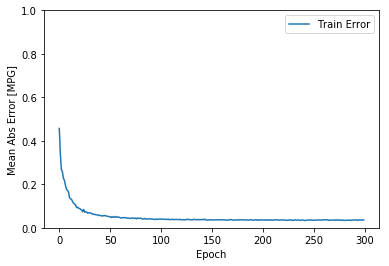

In [62]:
# one_host_hand_nml1
def build_model():
    model = keras.Sequential([
        layers.Dense(15, activation=tf.nn.relu, input_shape=(n, m - 1)),
        layers.Flatten(),
        layers.Dropout(rate=0.5),
        layers.Dense(1, activation=tf.nn.relu)
    ])

    optimizer = keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model

model = build_model()
model.summary()

# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 300

history = model.fit(one_hot_hand_nml1, value_hand_nml, epochs=EPOCHS, validation_split = 0, verbose=0, callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print('\n',hist.tail())

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    #plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,1])

plot_history(history)

predictions1 = model.predict(one_hot_hand_nml1)

In [63]:
for i, hand in enumerate(hand_nml):
    print('hand {}  predict value {:.6f}  true value {:.6f}'.format(hand, predictions1[i][0], value_hand_nml[i]))

hand (0, 0, 0, 0)  predict value 0.665859  true value 0.623207
hand (0, 0, 0, 1)  predict value 0.708372  true value 0.736842
hand (0, 0, 0, 2)  predict value 0.712488  true value 0.745743
hand (0, 0, 0, 3)  predict value 0.694643  true value 0.674165
hand (0, 0, 0, 4)  predict value 0.684092  true value 0.683535
hand (0, 0, 0, 5)  predict value 0.676216  true value 0.683535
hand (0, 0, 0, 6)  predict value 0.670221  true value 0.683535
hand (0, 0, 0, 7)  predict value 0.653646  true value 0.671090
hand (0, 0, 0, 8)  predict value 0.631779  true value 0.661170
hand (0, 0, 1, 1)  predict value 0.679921  true value 0.637316
hand (0, 0, 1, 2)  predict value 0.690987  true value 0.697673
hand (0, 0, 1, 3)  predict value 0.673143  true value 0.669670
hand (0, 0, 1, 4)  predict value 0.662592  true value 0.621600
hand (0, 0, 1, 5)  predict value 0.654715  true value 0.626149
hand (0, 0, 1, 6)  predict value 0.648721  true value 0.631045
hand (0, 0, 1, 7)  predict value 0.632146  true value 0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 4, 15)             150       
_________________________________________________________________
flatten_73 (Flatten)         (None, 60)                0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 61        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________

..................................................
..................................................
..................................................
..................................................
..................................................
....................

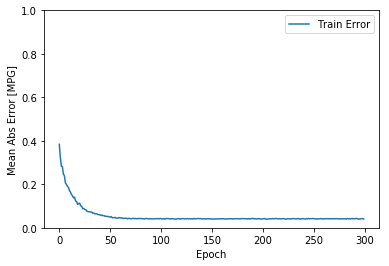

In [64]:
# one_host_hand_nml2
def build_model():
    model = keras.Sequential([
        layers.Dense(15, activation=tf.nn.relu, input_shape=(m - 1, n)),
        layers.Flatten(),
        layers.Dropout(rate=0.5),
        layers.Dense(1, activation=tf.nn.relu)
    ])

    optimizer = keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model

model = build_model()
model.summary()

# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 300

history = model.fit(one_hot_hand_nml2, value_hand_nml, epochs=EPOCHS, validation_split = 0, verbose=0, callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print('\n',hist.tail())

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    #plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,1])

plot_history(history)

predictions2 = model.predict(one_hot_hand_nml2)

In [65]:
for i, hand in enumerate(hand_nml):
    print('hand {}  predict value {:.6f}  true value {:.6f}'.format(hand, predictions2[i][0], value_hand_nml[i]))

hand (0, 0, 0, 0)  predict value 0.657674  true value 0.623207
hand (0, 0, 0, 1)  predict value 0.670348  true value 0.736842
hand (0, 0, 0, 2)  predict value 0.692119  true value 0.745743
hand (0, 0, 0, 3)  predict value 0.692409  true value 0.674165
hand (0, 0, 0, 4)  predict value 0.694862  true value 0.683535
hand (0, 0, 0, 5)  predict value 0.689058  true value 0.683535
hand (0, 0, 0, 6)  predict value 0.673642  true value 0.683535
hand (0, 0, 0, 7)  predict value 0.661132  true value 0.671090
hand (0, 0, 0, 8)  predict value 0.635304  true value 0.661170
hand (0, 0, 1, 1)  predict value 0.654591  true value 0.637316
hand (0, 0, 1, 2)  predict value 0.676362  true value 0.697673
hand (0, 0, 1, 3)  predict value 0.676652  true value 0.669670
hand (0, 0, 1, 4)  predict value 0.679105  true value 0.621600
hand (0, 0, 1, 5)  predict value 0.673301  true value 0.626149
hand (0, 0, 1, 6)  predict value 0.657885  true value 0.631045
hand (0, 0, 1, 7)  predict value 0.645375  true value 0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 9, 15)             90        
_________________________________________________________________
flatten_74 (Flatten)         (None, 135)               0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 135)               0         
_________________________________________________________________
dense_153 (Dense)            (None, 1)                 136       
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________

..................................................
..................................................
..................................................
..................................................
..................................................
....................

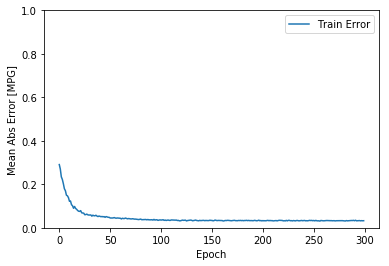

In [66]:
# one_host_hand_nml3
def build_model3():
    model = keras.Sequential([
        layers.Dense(15, activation=tf.nn.relu, input_shape=(n, l + 1)),
        layers.Flatten(),
        layers.Dropout(rate=0.5),
        layers.Dense(1, activation=tf.nn.relu)
    ])

    optimizer = keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model

model = build_model3()
model.summary()

# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 300

history = model.fit(one_hot_hand_nml3, value_hand_nml, epochs=EPOCHS, validation_split = 0, verbose=0, callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print('\n',hist.tail())

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    #plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,1])

plot_history(history)

predictions3 = model.predict(one_hot_hand_nml3)

In [67]:
for i, hand in enumerate(hand_nml):
    print('hand {}  predict value {:.6f}  true value {:.6f}'.format(hand, predictions3[i][0], value_hand_nml[i]))

hand (0, 0, 0, 0)  predict value 0.639735  true value 0.623207
hand (0, 0, 0, 1)  predict value 0.678229  true value 0.736842
hand (0, 0, 0, 2)  predict value 0.701267  true value 0.745743
hand (0, 0, 0, 3)  predict value 0.697670  true value 0.674165
hand (0, 0, 0, 4)  predict value 0.696347  true value 0.683535
hand (0, 0, 0, 5)  predict value 0.696783  true value 0.683535
hand (0, 0, 0, 6)  predict value 0.700302  true value 0.683535
hand (0, 0, 0, 7)  predict value 0.677260  true value 0.671090
hand (0, 0, 0, 8)  predict value 0.659126  true value 0.661170
hand (0, 0, 1, 1)  predict value 0.680609  true value 0.637316
hand (0, 0, 1, 2)  predict value 0.653796  true value 0.697673
hand (0, 0, 1, 3)  predict value 0.650200  true value 0.669670
hand (0, 0, 1, 4)  predict value 0.648876  true value 0.621600
hand (0, 0, 1, 5)  predict value 0.649312  true value 0.626149
hand (0, 0, 1, 6)  predict value 0.652831  true value 0.631045
hand (0, 0, 1, 7)  predict value 0.629789  true value 0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_194 (Dense)            (None, 9, 15)             75        
_________________________________________________________________
flatten_95 (Flatten)         (None, 135)               0         
_________________________________________________________________
dropout_95 (Dropout)         (None, 135)               0         
_________________________________________________________________
dense_195 (Dense)            (None, 1)                 136       
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 7, 2, 3)           30        
_________________________________________________________________
dense_196 (D

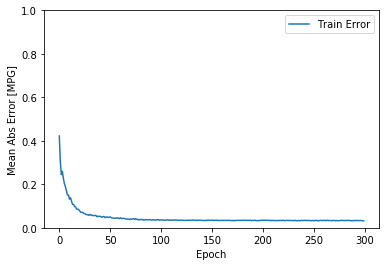

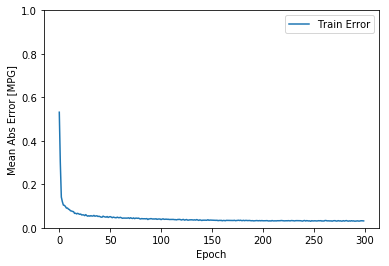

In [79]:
# one_host_hand_nml4
def build_dence_model():
    dence_model = keras.Sequential([
        layers.Dense(15, activation=tf.nn.relu, input_shape=(n, l)),
        layers.Flatten(),
        layers.Dropout(rate=0.5),
        layers.Dense(1, activation=tf.nn.relu)
    ])

    optimizer = keras.optimizers.RMSprop(0.001)

    dence_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return dence_model

def build_cnn_model():
    cnn_model = keras.Sequential([
        layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1, 1), padding='valid',  activation=tf.nn.relu, input_shape=(n, l, 1)),
        layers.Dense(15, activation=tf.nn.relu),
        layers.Flatten(),
        layers.Dropout(rate=0.5),
        layers.Dense(1, activation=tf.nn.relu)
    ])

    optimizer = keras.optimizers.RMSprop(0.001)

    cnn_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return cnn_model

dence_model = build_dence_model()
cnn_model = build_cnn_model()
dence_model.summary()
cnn_model.summary()

# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print('.', end='')

EPOCHS = 300

dence_hand4 = one_hot_hand_nml4[:]
cnn_hand4 = one_hot_hand_nml4[:, :, :, None] # Conv2Dのために次元を増やす
#print(cnn_hand4.shape)
#print(one_hot_hand_nml4.shape)
dence_history = dence_model.fit(dence_hand4, value_hand_nml, epochs=EPOCHS, validation_split = 0, verbose=0, callbacks=[PrintDot()])
print('')
cnn_history = cnn_model.fit(cnn_hand4, value_hand_nml, epochs=EPOCHS, validation_split = 0, verbose=0, callbacks=[PrintDot()])

dence_hist = pd.DataFrame(dence_history.history)
dence_hist['epoch'] = dence_history.epoch
cnn_hist = pd.DataFrame(cnn_history.history)
cnn_hist['epoch'] = cnn_history.epoch
print('\n',dence_hist.tail())
print('\n',cnn_hist.tail())

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    #plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,1])

plot_history(dence_history)
plot_history(cnn_history)

dence_predictions = dence_model.predict(dence_hand4)
cnn_predictions = cnn_model.predict(cnn_hand4)

In [73]:
for i, hand in enumerate(hand_nml):
    print('hand {}  dence_predict value {:.6f}  cnn_predict value {:.6f}  true value {:.6f}'.format(hand, dence_predictions[i][0], cnn_predictions[i][0], value_hand_nml[i]))

hand (0, 0, 0, 0)  dence_predict value 0.650646  cnn_predict value 0.652541  true value 0.623207
hand (0, 0, 0, 1)  dence_predict value 0.677484  cnn_predict value 0.716640  true value 0.736842
hand (0, 0, 0, 2)  dence_predict value 0.699307  cnn_predict value 0.709941  true value 0.745743
hand (0, 0, 0, 3)  dence_predict value 0.696466  cnn_predict value 0.669618  true value 0.674165
hand (0, 0, 0, 4)  dence_predict value 0.693939  cnn_predict value 0.671655  true value 0.683535
hand (0, 0, 0, 5)  dence_predict value 0.696725  cnn_predict value 0.667628  true value 0.683535
hand (0, 0, 0, 6)  dence_predict value 0.699020  cnn_predict value 0.661284  true value 0.683535
hand (0, 0, 0, 7)  dence_predict value 0.678468  cnn_predict value 0.651229  true value 0.671090
hand (0, 0, 0, 8)  dence_predict value 0.659890  cnn_predict value 0.648378  true value 0.661170
hand (0, 0, 1, 1)  dence_predict value 0.681844  cnn_predict value 0.649693  true value 0.637316
hand (0, 0, 1, 2)  dence_predi

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 7, 4, 50)          200       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 7, 2, 30)          4530      
_________________________________________________________________
dense_198 (Dense)            (None, 7, 2, 30)          930       
_________________________________________________________________
flatten_97 (Flatten)         (None, 420)               0         
_________________________________________________________________
dropout_97 (Dropout)         (None, 420)               0         
_________________________________________________________________
dense_199 (Dense)            (None, 1)                 421       
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________

.......

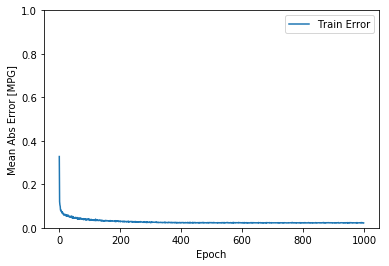

In [81]:
# one_host_hand_nml4
def build_cnn_model2():
    cnn_model = keras.Sequential([
        layers.Conv2D(filters=50, kernel_size=(3,1), strides=(1, 1), padding='valid',  activation=tf.nn.relu, input_shape=(n, l, 1)),
        layers.Conv2D(filters=30, kernel_size=(1,3), strides=(1, 1), padding='valid',  activation=tf.nn.relu),
        layers.Dense(30, activation=tf.nn.relu),
        layers.Flatten(),
        layers.Dropout(rate=0.5),
        layers.Dense(1, activation=tf.nn.relu)
    ])

    optimizer = keras.optimizers.RMSprop(0.001)

    cnn_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return cnn_model

cnn_model2 = build_cnn_model2()
cnn_model2.summary()

# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

cnn_hand4 = one_hot_hand_nml4[:, :, :, None] # Conv2Dのために次元を増やす
cnn_history = cnn_model2.fit(cnn_hand4, value_hand_nml, epochs=EPOCHS, validation_split = 0, verbose=0, callbacks=[PrintDot()])

cnn_hist = pd.DataFrame(cnn_history.history)
cnn_hist['epoch'] = cnn_history.epoch
print('\n',cnn_hist.tail())

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    #plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,1])

plot_history(cnn_history)

cnn_predictions2 = cnn_model2.predict(cnn_hand4)

In [82]:
for i, hand in enumerate(hand_nml):
    print('hand {}  cnn_predict value {:.6f}  true value {:.6f}'.format(hand,  cnn_predictions2[i][0], value_hand_nml[i]))

hand (0, 0, 0, 0)  cnn_predict value 0.660135  true value 0.623207
hand (0, 0, 0, 1)  cnn_predict value 0.740905  true value 0.736842
hand (0, 0, 0, 2)  cnn_predict value 0.747563  true value 0.745743
hand (0, 0, 0, 3)  cnn_predict value 0.691775  true value 0.674165
hand (0, 0, 0, 4)  cnn_predict value 0.695275  true value 0.683535
hand (0, 0, 0, 5)  cnn_predict value 0.692644  true value 0.683535
hand (0, 0, 0, 6)  cnn_predict value 0.689138  true value 0.683535
hand (0, 0, 0, 7)  cnn_predict value 0.668046  true value 0.671090
hand (0, 0, 0, 8)  cnn_predict value 0.658418  true value 0.661170
hand (0, 0, 1, 1)  cnn_predict value 0.665299  true value 0.637316
hand (0, 0, 1, 2)  cnn_predict value 0.702755  true value 0.697673
hand (0, 0, 1, 3)  cnn_predict value 0.647692  true value 0.669670
hand (0, 0, 1, 4)  cnn_predict value 0.641408  true value 0.621600
hand (0, 0, 1, 5)  cnn_predict value 0.638777  true value 0.626149
hand (0, 0, 1, 6)  cnn_predict value 0.635271  true value 0.63